<a href="https://colab.research.google.com/github/atakantatar/Air-Quality-Data-Analysis-Project-2/blob/main/AirQualityProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel(r"AirQualityUCI.xlsx")

In [4]:
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

df['Hour'] = df['Datetime'].dt.hour
hourly_avg_no = df.groupby('Hour')['NOx(GT)'].mean()
hourly_avg_no2 = df.groupby('Hour')['NO2(GT)'].mean()
df.drop(columns=["NMHC(GT)"], inplace=True)


df['C6H6(GT)'] = df['C6H6(GT)'].replace(-200, np.nan)
df = df.dropna(subset=['C6H6(GT)'])

df.replace(-200, np.nan, inplace=True)
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

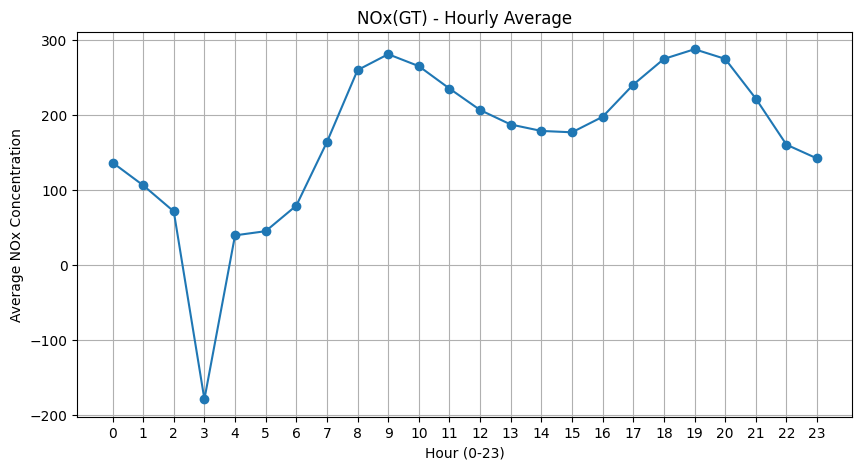

In [5]:
plt.figure(figsize=(10,5))
plt.plot(hourly_avg_no.index, hourly_avg_no.values, marker='o')
plt.title('NOx(GT) - Hourly Average')
plt.xlabel('Hour (0-23)')
plt.ylabel('Average NOx Concentration')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

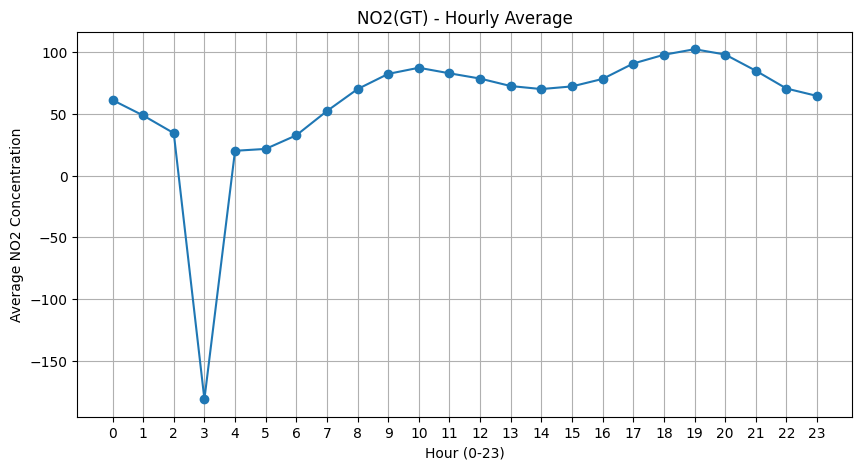

In [6]:
plt.figure(figsize=(10,5))
plt.plot(hourly_avg_no2.index, hourly_avg_no2.values, marker='o')
plt.title('NO2(GT) - Hourly Average')
plt.xlabel('Hour (0-23)')
plt.ylabel('Average NO2 Concentration')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

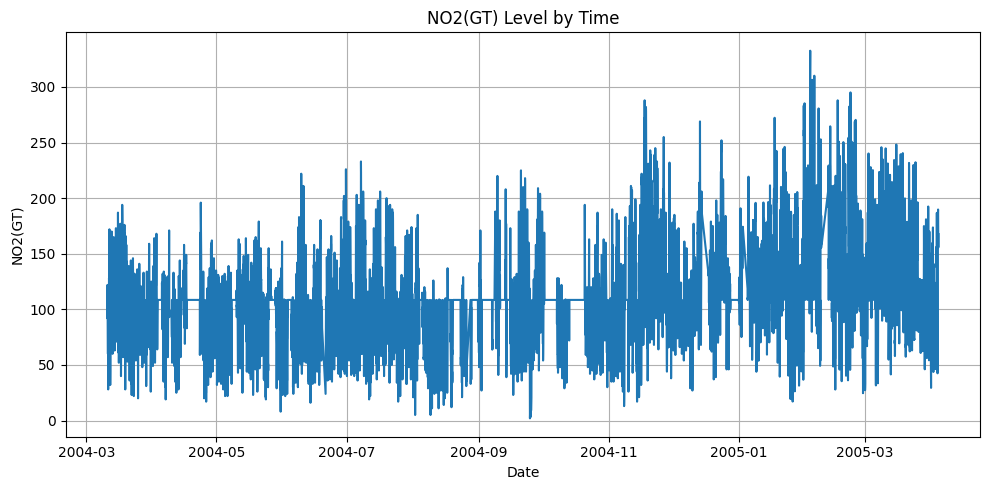

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df['Datetime'], df['NO2(GT)'])
plt.title("NO2(GT) Level by Time")
plt.xlabel("Date")
plt.ylabel("NO2(GT)")
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='C6H6(GT)', ylabel='CO(GT)'>

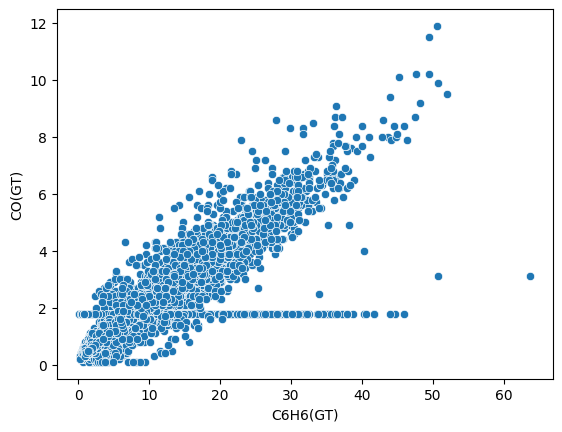

In [8]:
sns.scatterplot(data=df, x='C6H6(GT)', y='CO(GT)')

<Axes: xlabel='NO2(GT)', ylabel='NOx(GT)'>

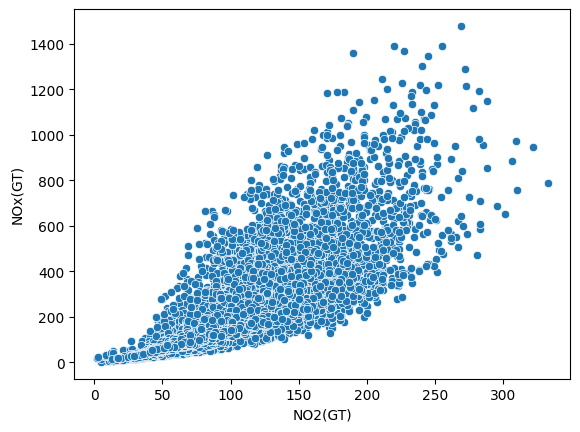

In [9]:
sns.scatterplot(data=df, x='NO2(GT)', y='NOx(GT)')